In [1]:
words= open('names.txt','r').read().splitlines()

In [2]:
words[0:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(words)

32033

In [4]:
#the longest word
max(len(word) for word in words)

15

In [5]:
#the shortest word 
min(len(word) for word in words)

2

In [6]:
bigrams={}
for word in words:
    chars=['<S>']+list(word)+['<E>']
    for ch1,ch2 in zip(chars[0:],chars[1:]):
        bigram = (ch1,ch2)
        bigrams[bigram] = bigrams[bigram]+1 if bigram in bigrams else 1

In [7]:
sorted(bigrams.items(),reverse=True,key= lambda kv:kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch
from matplotlib import pyplot as plt 

In [9]:
N=torch.zeros((27,27),dtype=torch.int32)

In [12]:
chars=sorted(set(''.join(words)))

In [13]:
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [14]:
for word in words:
    chars=['.']+list(word)+['.']
    for ch1,ch2 in zip(chars[0:],chars[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1
    

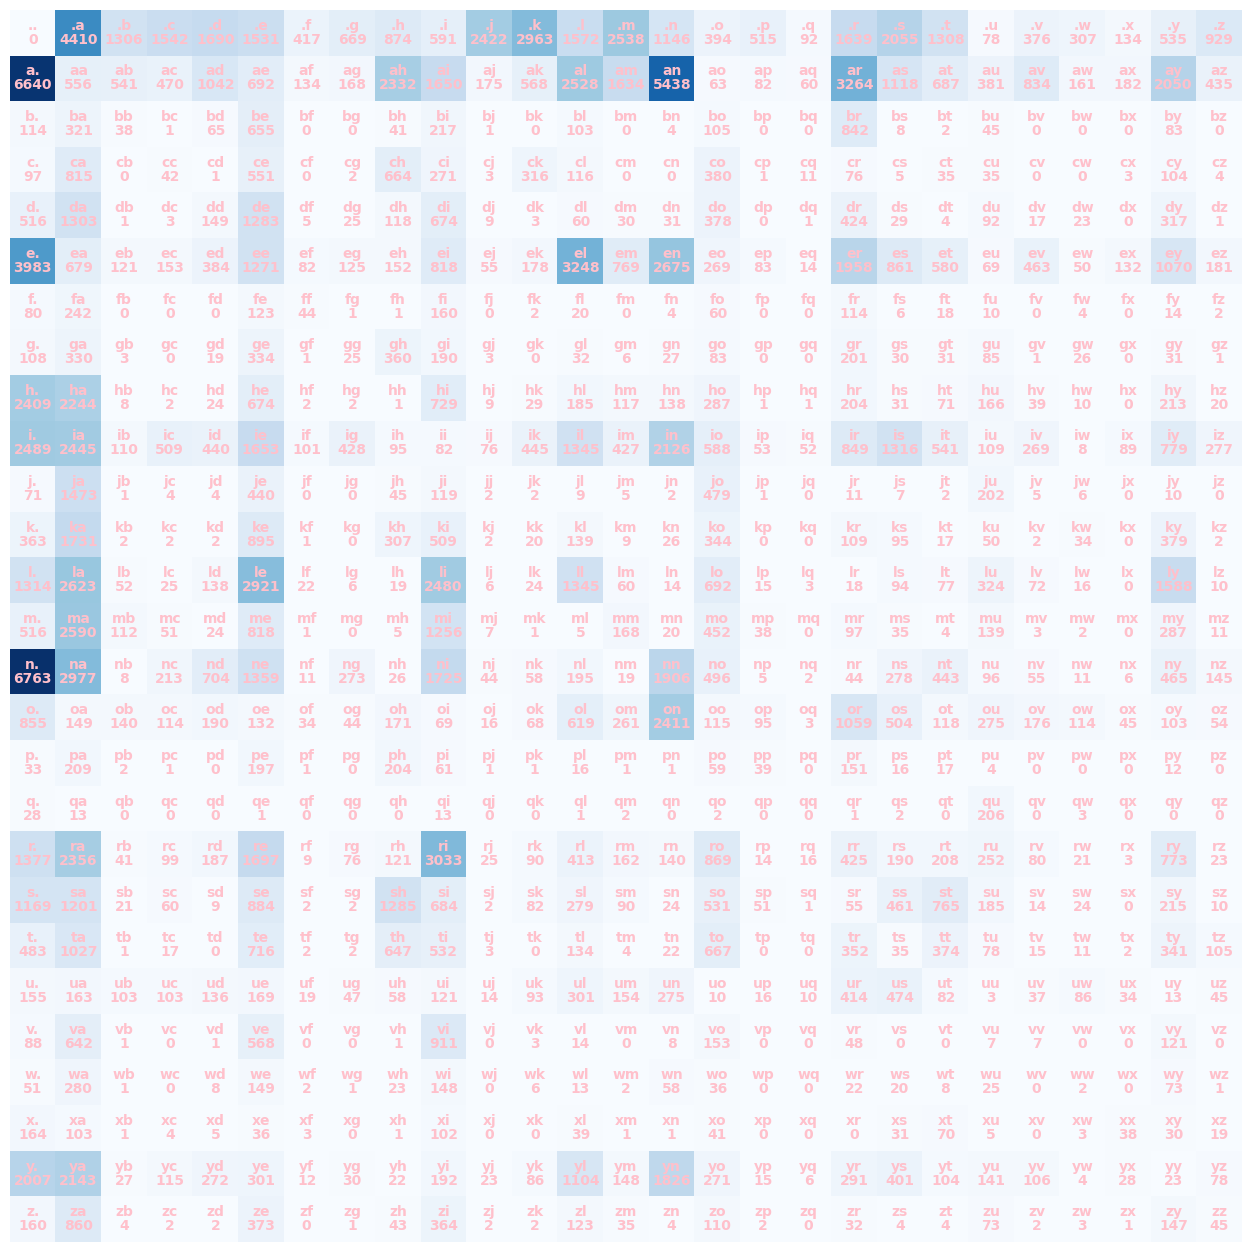

In [151]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        plt.text(j,i,itos[i]+itos[j],va="bottom",ha="center",fontweight='bold',color='pink')
        plt.text(j,i,N[i,j].item(),ha="center",va="top",fontweight='bold',color="pink")
plt.axis('off');

In [152]:
p=N[0].float()
p/=p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [153]:
g=torch.Generator().manual_seed(2147483647)

In [154]:
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'm'

In [155]:
g = torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p/=p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [156]:
dist=torch.multinomial(p,num_samples=100,replacement=True,generator=g)
dist

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [157]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)


In [158]:
g=torch.Generator().manual_seed(2147483647)
epochs=5
for i in range(epochs):
    out=[]
    ix=0
    while True:
        p = P[ix]
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [159]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [160]:
log_likelihood=0
n=0
for word in words:
    chars=['.']+list(word)+['.']
    for ch1,ch2 in zip(chars[0:],chars[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        log_prob=torch.log(prob)
        log_likelihood+=log_prob
        n+=1
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')
        

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [161]:
#create training set of bigrams(x,y)
xs=[]
ys=[]
for word in words:
    chars=["."]+list(word)+["."]
    for ch1,ch2 in zip(chars[0:],chars[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #print(f"({ch1},{ch2})")
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)


In [162]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [163]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [164]:
import torch.nn.functional as F


In [165]:
xencode=F.one_hot(xs,num_classes=27).float()
xencode

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [166]:
W=torch.randn((27,27),generator=g)
logits=xencode @ W
counts=logits.exp()
probs=counts / counts.sum(1,keepdims=True)
probs

tensor([[0.0921, 0.0154, 0.0244,  ..., 0.0930, 0.0077, 0.0121],
        [0.0208, 0.0166, 0.0247,  ..., 0.0206, 0.0481, 0.0112],
        [0.0171, 0.0163, 0.0035,  ..., 0.0522, 0.0084, 0.0116],
        ...,
        [0.0462, 0.0259, 0.0373,  ..., 0.0242, 0.0133, 0.0115],
        [0.0078, 0.1046, 0.0142,  ..., 0.0096, 0.0559, 0.0144],
        [0.0360, 0.0256, 0.0235,  ..., 0.0070, 0.0363, 0.0184]])

In [167]:
probs.shape

torch.Size([228146, 27])

In [168]:
nlls=torch.zeros(5)
word_length=len(words[0])
print("--------------------SUMMARY--------------------")
for i in range(word_length):
    x=xs[i].item()#input x
    y=ys[i].item()#label y
    p=probs[i,y]
    logp=torch.log(p)
    nll=-logp
    nlls[i]=nll
    
   
    print(f"bigram example {i+1} | bigram => ({itos[x]},{itos[y]}) | index values => ({x},{y})")
    print(f"input value: {x}")
    print(f"output probablities: {probs[i]}")
    print(f"Actual Label Index: {y}")
    print(f"Probability for the actual value: {p.item()}")
    print(f"Log Likelihood: {logp.item()}")
    print(f"Negative Log Likelihood: {nll.item()}")
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    
print("---------------------END------------------------")
print()
print("=============================================")
print(f"Average Negative Likelihood: {nll.mean().item()}")
print("=============================================")        
    
    
    
    
    

--------------------SUMMARY--------------------
bigram example 1 | bigram => (.,e) | index values => (0,5)
input value: 0
output probablities: tensor([0.0921, 0.0154, 0.0244, 0.0069, 0.1344, 0.0355, 0.0093, 0.0165, 0.0109,
        0.0660, 0.0185, 0.0817, 0.0068, 0.0496, 0.0040, 0.0158, 0.0267, 0.0857,
        0.0843, 0.0365, 0.0273, 0.0101, 0.0265, 0.0022, 0.0930, 0.0077, 0.0121])
Actual Label Index: 5
Probability for the actual value: 0.03554064780473709
Log Likelihood: -3.337078332901001
Negative Log Likelihood: 3.337078332901001
++++++++++++++++++++++++++++++++++++++++++++++++
bigram example 2 | bigram => (e,m) | index values => (5,13)
input value: 5
output probablities: tensor([0.0208, 0.0166, 0.0247, 0.0148, 0.0103, 0.0423, 0.0330, 0.0232, 0.0982,
        0.0795, 0.0459, 0.0136, 0.0582, 0.0872, 0.0096, 0.0511, 0.0655, 0.0124,
        0.0320, 0.0149, 0.0516, 0.0635, 0.0343, 0.0169, 0.0206, 0.0481, 0.0112])
Actual Label Index: 13
Probability for the actual value: 0.08715402334928513

In [169]:
### We have to optimize weights because the first one was random W values

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


In [170]:
##Forward Pass

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(xs.shape[0]), ys].log().mean()

In [171]:
probs.shape

torch.Size([228146, 27])

In [172]:
print(loss.item())

3.758953809738159


In [173]:
## Backward Pass
lr=0.1
W.grad=None # this is more efficient rather than assigning 0
loss.backward()
W.data-=lr*W.grad

In [175]:
#Organized Optimization
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
loss_data=[]
##Forward Pass
epochs=100
lr=50
for i in range(epochs):
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    regularization_term=0.01*(W**2).mean()
    loss = -probs[torch.arange(len(xs)), ys].log().mean() + regularization_term
    loss_data.append(loss.item())
    print(f"{i+1}.Epoch => Loss: {loss.item()}")
    W.grad=None # this is more efficient rather than assigning 0
    loss.backward()
    W.data-=lr*W.grad


1.Epoch => Loss: 3.7686190605163574
2.Epoch => Loss: 3.3788065910339355
3.Epoch => Loss: 3.16109037399292
4.Epoch => Loss: 3.0271859169006348
5.Epoch => Loss: 2.9344840049743652
6.Epoch => Loss: 2.867231607437134
7.Epoch => Loss: 2.8166539669036865
8.Epoch => Loss: 2.777146100997925
9.Epoch => Loss: 2.745253801345825
10.Epoch => Loss: 2.7188303470611572
11.Epoch => Loss: 2.696505308151245
12.Epoch => Loss: 2.6773722171783447
13.Epoch => Loss: 2.6608052253723145
14.Epoch => Loss: 2.6463513374328613
15.Epoch => Loss: 2.633665084838867
16.Epoch => Loss: 2.622471570968628
17.Epoch => Loss: 2.6125476360321045
18.Epoch => Loss: 2.6037068367004395
19.Epoch => Loss: 2.595794916152954
20.Epoch => Loss: 2.5886809825897217
21.Epoch => Loss: 2.5822560787200928
22.Epoch => Loss: 2.5764293670654297
23.Epoch => Loss: 2.5711236000061035
24.Epoch => Loss: 2.566272735595703
25.Epoch => Loss: 2.5618226528167725
26.Epoch => Loss: 2.5577263832092285
27.Epoch => Loss: 2.5539438724517822
28.Epoch => Loss: 2.

In [176]:
##Creating New Dataset

#create training set of bigrams(x,y)
def create_bigram_dataset(word):
    xs=[]
    ys=[]
    chars=["."]+list(word)+["."]
    for ch1,ch2 in zip(chars[0:],chars[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #print(f"({ch1},{ch2})")
        xs.append(ix1)
        ys.append(ix2)
    xs=torch.tensor(xs)
    ys=torch.tensor(ys)
    return (xs,ys)





In [177]:
wo="andrej"
xs,ys=create_bigram_dataset(wo)
xenc=F.one_hot(xs,num_classes=27).float()

In [178]:
##Model-Test

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
regularization_term=0.01*(W**2).mean()
loss = -probs[torch.arange(xs.shape[0]), ys].log().mean() + regularization_term
print(f"Loss: {loss.item()}")

Loss: 3.079833507537842


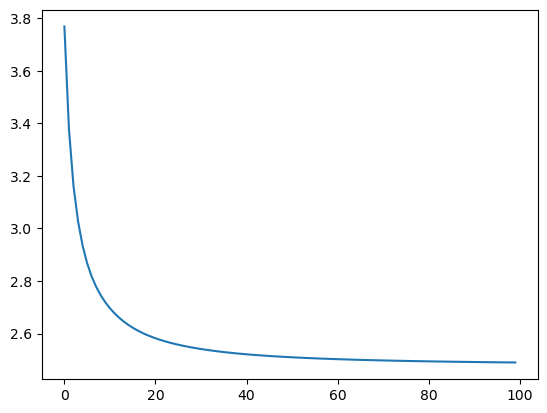

In [179]:
plt.plot(loss_data)

In [180]:
g = torch.Generator().manual_seed(2147483647)
for i in range(len(wo)):
    out=[]
    ix=0
    while True:
        xenc=F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits=xenc @ W
        counts=logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
odaren.
